# VGG 실습
Cifar-10 Dataset으로 데이터 분류 실습  
Cifar-10의 10은 클래스가 10개여서 10임  
+) Cifat-100은 클래스가 100개  
데이터는 32x32x3 사이즈

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## 데이터 셋 로드

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print('train data')
print(x_train.shape)
print(y_train.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(50000, 32, 32, 3)
(50000, 1)
test data
(10000, 32, 32, 3)
(10000, 1)


In [3]:
print(y_test[:10,:])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


## VGG16 모델 만들기
vgg16 하고 vgg19의 차이는 레이어의 수 차이임  
conv layer가 3개 더있는거

In [4]:
def vgg16(input_shape = (224,224,3)):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(input_shape = input_shape, filters = 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding = 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), activation= 'relu', padding= 'same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))  

# fully connected
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 원래vgg모델은 output이 1000이지만 cifar-10은 10개 클래스임으로 10으로 변경

  return model

In [5]:
vgg_cifar10 = vgg16(input_shape = (32,32,3))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_cifar10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc']) # 최적화 기법 : 아담, 로스 : 카테고리 크로스엔트로피,  정확도

vgg_cifar10.summary()  # 모델 요약, 정리 및 확인, 위의 VGG16 모델과 같음 (+ flatten은 풀리커넥트를 위해서 펴주는거)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

## 모델 학습하기
데이터 나누기
 - Train  : 모델을 학습하는데 사용
 - Validation  : 모델의 성능을 평가하는데 사용
 - Test  : 모델의 성능을 최종적으로 테스트 하는데 사용

In [6]:
print('train data')
print(x_train.shape)
print(y_train.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(50000, 32, 32, 3)
(50000, 1)
test data
(10000, 32, 32, 3)
(10000, 1)


Dataset  
> train: 4만  
> valid: 1만  
> test: 1만  

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state=123)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(40000, 32, 32, 3)
(40000, 1)
test data
(10000, 32, 32, 3)
(10000, 1)


In [8]:
# scalar 형태의 레이블(0-9)을 one-hot encoding 형태로 변환합니다

y_train = tf.squeeze(tf.one_hot(y_train, 10),axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 10), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('valid data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(40000, 32, 32, 3)
(40000, 10)
valid data
(10000, 32, 32, 3)
(10000, 10)
test data
(10000, 32, 32, 3)
(10000, 10)


In [9]:
print(y_test[:10,:])

tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)


In [10]:
history = vgg_cifar10.fit(x_train, y_train, batch_size=32, epochs=11, validation_data=(x_valid, y_valid))

Epoch 1/11
1250/1250 [==============================] - 76s 35ms/step - loss: 1.7631 - acc: 0.3111 - val_loss: 1.5046 - val_acc: 0.4195
Epoch 2/11
1250/1250 [==============================] - 43s 34ms/step - loss: 1.2867 - acc: 0.5245 - val_loss: 1.1996 - val_acc: 0.5643
Epoch 3/11
1250/1250 [==============================] - 43s 34ms/step - loss: 0.9962 - acc: 0.6449 - val_loss: 1.0245 - val_acc: 0.6495
Epoch 4/11
1250/1250 [==============================] - 43s 34ms/step - loss: 0.7897 - acc: 0.7282 - val_loss: 0.8968 - val_acc: 0.6959
Epoch 5/11
1250/1250 [==============================] - 43s 34ms/step - loss: 0.6183 - acc: 0.7864 - val_loss: 0.8784 - val_acc: 0.7153
Epoch 6/11
1250/1250 [==============================] - 43s 34ms/step - loss: 0.4742 - acc: 0.8382 - val_loss: 0.8813 - val_acc: 0.7242
Epoch 7/11
1250/1250 [==============================] - 43s 34ms/step - loss: 0.3646 - acc: 0.8780 - val_loss: 0.9072 - val_acc: 0.7323
Epoch 8/11
1250/1250 [==========================

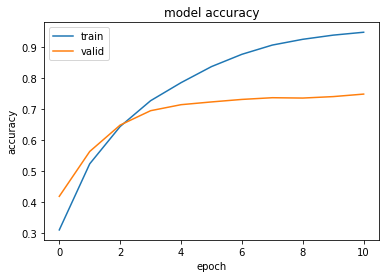

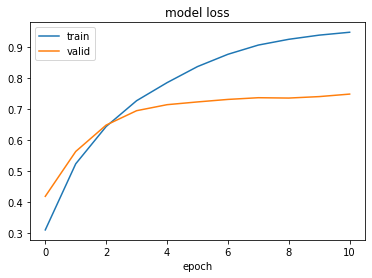

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [12]:
import numpy as np

print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

validation accuracy
0.7494999766349792
0.7494999766349792


In [13]:
results = vgg_cifar10.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.1529 - acc: 0.7482
test accuracy
0.748199999332428
